In [1]:
import cv2
import torch
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import matplotlib.image as mpimage

## Using PIL, numpy.roll()

original image size:  (256, 256)


<function matplotlib.pyplot.show(close=None, block=None)>

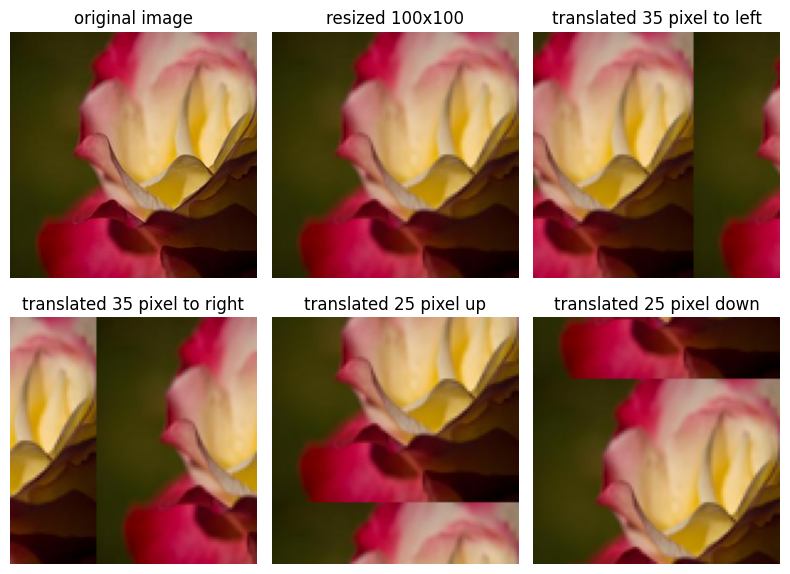

In [2]:
image_path = '/kaggle/input/flower-classification/train/rose/10063573746_dae22f863b_c.jpg'
image = Image.open(image_path).convert('RGB')
print('original image size: ', image.size)

fig, axes = plt.subplots(2,3, figsize=(8, 6))

axes[0, 0].imshow(image) # original image
axes[0, 0].set_title('original image')
axes[0, 0].axis('off')

image_resize = image.resize((100, 100)) # resize
axes[0, 1].imshow(image_resize)
axes[0, 1].set_title('resized 100x100')
axes[0, 1].axis('off')

trasformed_image = np.array(image_resize)/255.0  # scale

image_translation = np.roll(trasformed_image, -35, axis=1) # shift 35 pixel left
axes[0, 2].imshow(image_translation)
axes[0, 2].set_title('translated 35 pixel to left')
axes[0, 2].axis('off')

image_translation = np.roll(trasformed_image, 35, axis=1) # shift 35 pixel right
axes[1, 0].imshow(image_translation)
axes[1, 0].set_title('translated 35 pixel to right')
axes[1, 0].axis('off')

image_translation = np.roll(trasformed_image, -25, axis=0) # shift 25 pixel up
axes[1, 1].imshow(image_translation)
axes[1, 1].set_title('translated 25 pixel up')
axes[1, 1].axis('off')

image_translation = np.roll(trasformed_image, 25, axis=0) # shift 25 pixel down
axes[1, 2].imshow(image_translation)
axes[1, 2].set_title('translated 25 pixel down')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show

## Using OpenCV, torch.roll()

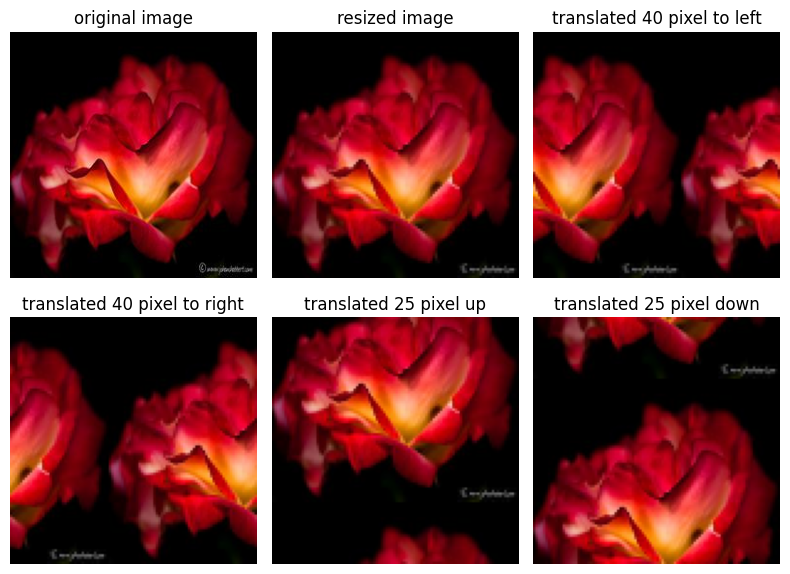

In [3]:
image_path = '/kaggle/input/flower-classification/train/rose/14231694574_b08d90cab1_c.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to rgb

fig, axes = plt.subplots(2, 3, figsize=(8, 6))
axes[0, 0].imshow(image) # original image
axes[0, 0].set_title('original image')
axes[0, 0].axis('off')

image_resize = cv2.resize(image, (100, 100))
axes[0, 1].imshow(image_resize) # resize
axes[0, 1].set_title('resized image')
axes[0, 1].axis('off')

image_transformed = torch.tensor(image_resize) / 255.0 # scale

image_translation = torch.roll(image_transformed, -40, dims=1) # shift 40 pixel left
axes[0, 2].imshow(image_translation)
axes[0, 2].set_title('translated 40 pixel to left')
axes[0, 2].axis('off')

image_translation = torch.roll(image_transformed, 40, dims=1) # shift 40 pixel right
axes[1, 0].imshow(image_translation)
axes[1, 0].set_title('translated 40 pixel to right')
axes[1, 0].axis('off')

image_translation = torch.roll(image_transformed, -25, dims=0) # shift 25 pixel up
axes[1, 1].imshow(image_translation)
axes[1, 1].set_title('translated 25 pixel up')
axes[1, 1].axis('off')

image_translation = torch.roll(image_transformed, 25, dims=0) # shift 25 pixel down
axes[1, 2].imshow(image_translation)
axes[1, 2].set_title('translated 25 pixel down')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## OpenCv warpAffine()

(-0.5, 99.5, 99.5, -0.5)

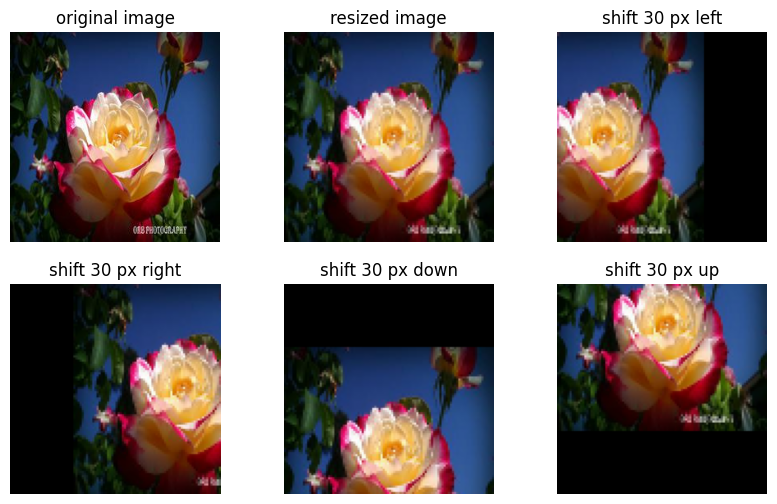

In [30]:
image_path = '/kaggle/input/flower-classification/train/rose/15625118846_f1395c9fda_c.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

axes[0, 0].imshow(image) 
axes[0, 0].set_title('original image')
axes[0, 0].axis('off')

resized_image = cv2.resize(image, (100, 100))
axes[0, 1].imshow(resized_image)
axes[0, 1].set_title('resized image')
axes[0, 1].axis('off')

transformed_image = resized_image / 255.0

tx, ty = -30, 0 # left shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]))
axes[0, 2].imshow(image_translation)
axes[0, 2].set_title('shift 30 px left')
axes[0, 2].axis('off')

tx, ty = 30, 0 # right shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]))
axes[1, 0].imshow(image_translation)
axes[1, 0].set_title('shift 30 px right')
axes[1, 0].axis('off')

tx, ty = 0, 30 # down shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]))
axes[1, 1].imshow(image_translation)
axes[1, 1].set_title('shift 30 px down')
axes[1, 1].axis('off')

tx, ty = 0, -30 # up shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]))
axes[1, 2].imshow(image_translation)
axes[1, 2].set_title('shift 30 px up')
axes[1, 2].axis('off')

## Instead of black fill, Wrap Around in cv2.warpAffine(), like np.roll() and torch.roll()

(-0.5, 99.5, 99.5, -0.5)

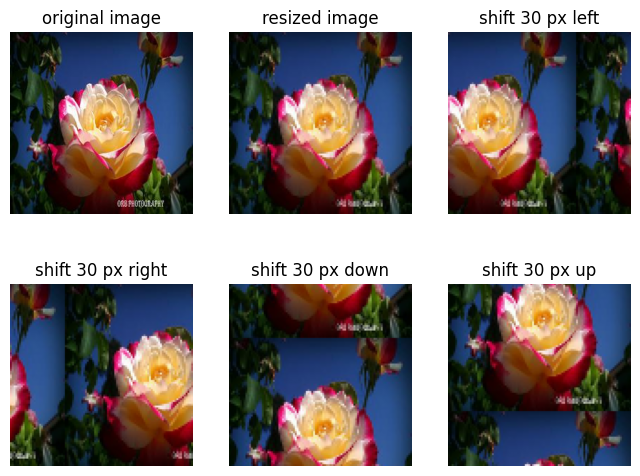

In [32]:
image_path = '/kaggle/input/flower-classification/train/rose/15625118846_f1395c9fda_c.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(2, 3, figsize=(8, 6))

axes[0, 0].imshow(image) 
axes[0, 0].set_title('original image')
axes[0, 0].axis('off')

resized_image = cv2.resize(image, (100, 100))
axes[0, 1].imshow(resized_image)
axes[0, 1].set_title('resized image')
axes[0, 1].axis('off')

transformed_image = resized_image / 255.0

tx, ty = -30, 0 # left shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]), borderMode=cv2.BORDER_WRAP)
axes[0, 2].imshow(image_translation)
axes[0, 2].set_title('shift 30 px left')
axes[0, 2].axis('off')

tx, ty = 30, 0 # right shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]), borderMode=cv2.BORDER_WRAP)
axes[1, 0].imshow(image_translation)
axes[1, 0].set_title('shift 30 px right')
axes[1, 0].axis('off')

tx, ty = 0, 30 # down shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]), borderMode=cv2.BORDER_WRAP)
axes[1, 1].imshow(image_translation)
axes[1, 1].set_title('shift 30 px down')
axes[1, 1].axis('off')

tx, ty = 0, -30 # up shift
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
image_translation = cv2.warpAffine(transformed_image, translation_matrix, (transformed_image.shape[1], transformed_image.shape[0]), borderMode=cv2.BORDER_WRAP)
axes[1, 2].imshow(image_translation)
axes[1, 2].set_title('shift 30 px up')
axes[1, 2].axis('off')